In [2]:
#####
# for running on Colab
####
# from google.colab import drive
# drive.mount("/content/drive")
# %cd drive/MyDrive/BullingerDigitalLMFootnotes/git_repo

Mounted at /content/drive
[Errno 2] No such file or directory: 'drive/MyDrive/BullingerLMFootnotes/github/BullingerDigitalLMFootnotes'
/content


In [2]:
len(lit_map)

716

In [28]:
import pandas as pd
lit_df = pd.read_csv("../../data/literatur.tsv", sep="\t", header=None, names=["title", "pubTitle", "volume", "entry"])
lit_map = {title: pubTitle for title, pubTitle in zip(lit_df.title, lit_df.pubTitle)}
# in der edition so angegeben:
lit_map["ASD"] = lit_map["ASD (Erasmus)"]
lit_map["BZD"] = lit_map["BZD (Vischer, BZD)"]
lit_df

,title,pubTitle,volume,entry
0,"A Lasco, Opera",Opera tam edita quam inedita,NaN,"Johannes a Lasco, Opera tam edita quam inedita, hg. v. Abraham Kuyper, 2 Bde., Amsterdam-Den Haag 1866."
1,ABaslerRef,Aktensammlung zur Geschichte der Basler Reformation in den Jahren 1519 bis Anfang 1534,NaN,"Aktensammlung zur Geschichte der Basler Reformation in den Jahren 1519 bis Anfang 1534, hg. v. Emil Dürr und Paul Roth, 6 Bde., Basel 1921-1950."
2,ABernerRef,Aktensammlung zur Geschichte der Berner Reformation 1521-1532,NaN,"Aktensammlung zur Geschichte der Berner Reformation 1521-1532, hg. v. Rudolf Steck und Gustav Tobler, 2 Bde., Bern 1923."
3,ACO,Acta Conciliorum Oecumenicorum,NaN,"Acta Conciliorum Oecumenicorum, hg. v. Eduard Schwartz, 4 Bde., Berlin 1914-1984; Serie 2, Berlin 1984ff."
4,ADB,Allgemeine Deutsche Biographie,NaN,"Allgemeine Deutsche Biographie, 55 Bde., Leipzig 1875-1910; Registerband, München/Leipzig 1912."
...,...,...,...,...
713,Zwa,Zwingliana,NaN,"Zwingliana. Mitteilungen zur Geschichte Zwinglis und der Reformation (ab 1934: Beiträge zur Geschichte Zwinglis, der Reformation und des Protestantismus in der Schweiz; ab 2010: Beiträge zur Geschichte des Protestantismus in der Schweiz und seiner Ausstrahlung), Zürich 1897ff."
714,Zwingli Bibl. (Finsler),Zwingli-Bibliographie,NaN,"Georg Finsler, Zwingli-Bibliographie. Verzeichnis der gedruckten Schriften von und über Ulrich Zwingli, Zürich 1897."
715,Zürcher Kunst,Zürcher Kunst nach der Reformation. Hans Asper und seine Zeit. Katalog der Ausstellung im Helmhaus,NaN,"Zürcher Kunst nach der Reformation. Hans Asper und seine Zeit. Katalog der Ausstellung im Helmhaus, Zürich 9. Mai bis 28. Juni 1981, Zürich 1981."
716,"Zürcher, Pellikan (Zürcher)",Konrad Pellikans Wirken in Zürich 1526-1556,NaN,"Christoph Zürcher, Konrad Pellikans Wirken in Zürich 1526-1556, Zürich 1975 - ZBRG 4."


In [29]:
pd.set_option('display.max_colwidth', None)  # show whole text in the cells
footnote_df = pd.read_csv("footnote_df.csv")
footnote_df.head()

,letter_id,edition,n_footnote,n_sentence,xml_footnote,xml_sentence,text_footnote,text_sentence,len_footnote,pos_footnote,label
0,10013,20,3,2,"<note xmlns=""http://www.tei-c.org/ns/1.0"" xml:id=""fn3"" type=""footnote"" n=""3""><persName ref=""p9709"" cert=""high"">Wolfgang Joner, gen. Rüplin</persName>, Abt des Zisterzienserklosters Kappel am Albis. - Er gründete die Klosterschule und ernannte am 17. Januar 1523 Bullinger zu deren Schulmeister; s. <bibl>HBBW</bibl> I <ref target=""file10017"">[Nr. 2]</ref> 48f, Anm. 4.</note>","<s xmlns=""http://www.tei-c.org/ns/1.0"" n=""2"" xml:lang=""la"" type=""auto"">Quid in hoc ęvo litteratissimo te iuvene venerando patri Volffgango Ruͤppli<note xml:id=""fn3"" type=""footnote"" n=""3""><persName ref=""p9709"" cert=""high"">Wolfgang Joner, gen. Rüplin</persName>, Abt des Zisterzienserklosters Kappel am Albis. - Er gründete die Klosterschule und ernannte am 17. Januar 1523 Bullinger zu deren Schulmeister; s. <bibl>HBBW</bibl> I <ref target=""file10017"">[Nr. 2]</ref> 48f, Anm. 4.</note> ac suis fratribus, tum singulis de sodalicio, foelicius obtigerit?</s>","Wolfgang Joner, gen. Rüplin, Abt des Zisterzienserklosters Kappel am Albis. - Er gründete die Klosterschule und ernannte am 17. Januar 1523 Bullinger zu deren Schulmeister; s. HBBW I [Nr. 2] 48f, Anm. 4.","Quid in hoc ęvo litteratissimo te iuvene venerando patri Volffgango Ruͤppli__3 ac suis fratribus, tum singulis de sodalicio, foelicius obtigerit?",33,10,self_ref
1,10013,20,4,3,"<note xmlns=""http://www.tei-c.org/ns/1.0"" xml:id=""fn4"" type=""footnote"" n=""4"">Vgl. dazu etwa Bullingers Aufzeichnungen über seine Lektüre während seiner Schul- und Studienzeit sowie als Lehrer im Kloster Kappel in <bibl>HBD</bibl> 2-8.</note>","<s xmlns=""http://www.tei-c.org/ns/1.0"" n=""3"" xml:lang=""la"" type=""auto"">Est profecto nihil, cui in promptu sint tot volumina a summis autoribus ędita,<note xml:id=""fn4"" type=""footnote"" n=""4"">Vgl. dazu etwa Bullingers Aufzeichnungen über seine Lektüre während seiner Schul- und Studienzeit sowie als Lehrer im Kloster Kappel in <bibl>HBD</bibl> 2-8.</note> quibus et tuum excercites<note xml:id=""fn5"" type=""footnote"" n=""5"">= exercites.</note> ingenium, quod tibi est in numerato, ut alias taceam dotes (invidia dictis absit!) sane quam pręclaras.</s>",Vgl. dazu etwa Bullingers Aufzeichnungen über seine Lektüre während seiner Schul- und Studienzeit sowie als Lehrer im Kloster Kappel in HBD 2-8.,"Est profecto nihil, cui in promptu sint tot volumina a summis autoribus ędita,__4 quibus et tuum excercites__5 ingenium, quod tibi est in numerato, ut alias taceam dotes (invidia dictis absit!) sane quam pręclaras.",22,12,misc
2,10013,20,5,3,"<note xmlns=""http://www.tei-c.org/ns/1.0"" xml:id=""fn5"" type=""footnote"" n=""5"">= exercites.</note>","<s xmlns=""http://www.tei-c.org/ns/1.0"" n=""3"" xml:lang=""la"" type=""auto"">Est profecto nihil, cui in promptu sint tot volumina a summis autoribus ędita,<note xml:id=""fn4"" type=""footnote"" n=""4"">Vgl. dazu etwa Bullingers Aufzeichnungen über seine Lektüre während seiner Schul- und Studienzeit sowie als Lehrer im Kloster Kappel in <bibl>HBD</bibl> 2-8.</note> quibus et tuum excercites<note xml:id=""fn5"" type=""footnote"" n=""5"">= exercites.</note> ingenium, quod tibi est in numerato, ut alias taceam dotes (invidia dictis absit!) sane quam pręclaras.</s>",= exercites.,"Est profecto nihil, cui in promptu sint tot volumina a summis autoribus ędita,__4 quibus et tuum excercites__5 ingenium, quod tibi est in numerato, ut alias taceam dotes (invidia dictis absit!) sane quam pręclaras.",2,16,lex
3,10013,20,6,4,"<note xmlns=""http://www.tei-c.org/ns/1.0"" xml:id=""fn6"" type=""footnote"" n=""6"">Die Rede ist hier von handschriftlichen Abhandlungen (die ersten gedruckten Schriften aus Bullingers Feder sind erst 1526 erschienen; s. <bibl>HBBibl</bibl> I 3f). In seinem Diarium listet Bullinger die von ihm in Kappel (1523-1529) verfassten Schriften auf (s. <bibl>HBD</b

<Axes: ylabel='count'>

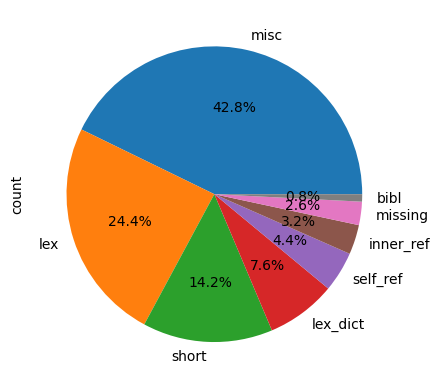

In [11]:
label_counts = footnote_df.label.value_counts()
label_counts.plot(kind="pie", autopct='%1.1f%%')

## Taking only the misc Category from now on

In [22]:
# ignor lex and sel_ref footnotes
footnote_df = footnote_df[~(footnote_df.label.isin(["lex", "lex_dict"]))]

In [25]:
footnote_df = footnote_df[footnote_df["label"] == "misc"]


In [30]:
from collections import defaultdict, Counter
from html import unescape  # from xml.sax.saxutils import unescape ->> does not work properly... :/
import re

lit_counter_new = defaultdict(int)
for xml_footnote in footnote_df["xml_footnote"]:
    matches = re.findall(r"<bibl.*?>(.*?)</bibl>", xml_footnote)
    for match in matches:
        match = unescape(match)  # take away excape sequences of the xml
        lit_counter_new[match] += 1
    # don't forget bible quotes
    bible_matches = re.findall(r"<cit[^>]+?type=\"bible\"", xml_footnote)
    for match in bible_matches:
        lit_counter_new["bible"] += 1

lit_counter_new = Counter(lit_counter_new)


([<matplotlib.patches.Wedge at 0x7fce34885fd0>,
 [Text(-1.0149975751466305, 0.42400462550125617, 'HBBW'),
  Text(-1.0998399339420324, 0.018764852954018408, 'HBBibl'),
  Text(-0.8459173442151843, -0.7031527904772401, 'bible'),
  Text(-0.19330977448753342, -1.0828810327490177, 'Adagia'),
  Text(-0.051247067096867084, -1.0988055961424519, 'Z'),
  Text(0.5188582039963084, -0.9699413199496789, 'SI'),
  Text(0.9455798419621154, -0.5620309266178339, 'LB'),
  Text(1.0336516375447453, -0.37625030525046277, 'EA'),
  Text(0.49291508238113624, 0.9833792358806432, 'Others')],
 [Text(-0.553635040989071, 0.23127525027341242, '9.6%'),
  Text(-0.5999126912411086, 0.010235374338555493, '2.4%'),
  Text(-0.46140946048100956, -0.3835378857148582, '20.2%'),
  Text(-0.10544169517501821, -0.5906623814994642, '2.1%'),
  Text(-0.027952945689200228, -0.5993485069867919, '2.0%'),
  Text(0.2830135658161682, -0.5290589017907339, '15.1%'),
  Text(0.5157708228884266, -0.30656232360972757, '2.2%'),
  Text(0.5638099841

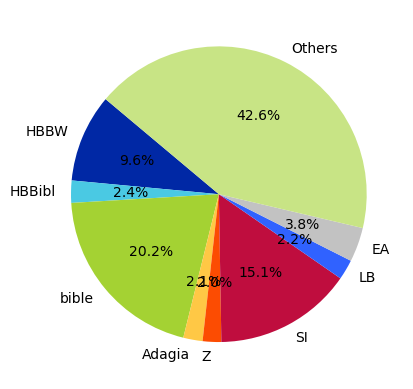

In [39]:
import matplotlib.pyplot as plt
# Unpacking the Counter object into two lists: one for keys and one for values
# labels, values = zip(*lit_counter_new.items())
# Total count
total_count = sum(lit_counter_new.values())

# Group items into "Others" if they represent less than 1% of the total
threshold = 0.02 * total_count
labels = []
values = []
others_count = 0

for item, count in lit_counter_new.items():
    if count < threshold:
        others_count += count
    else:
        labels.append(item)
        values.append(count)

# Add the "Others" category if it exists
if others_count > 0:
    labels.append('Others')
    values.append(others_count)
# Create a pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)


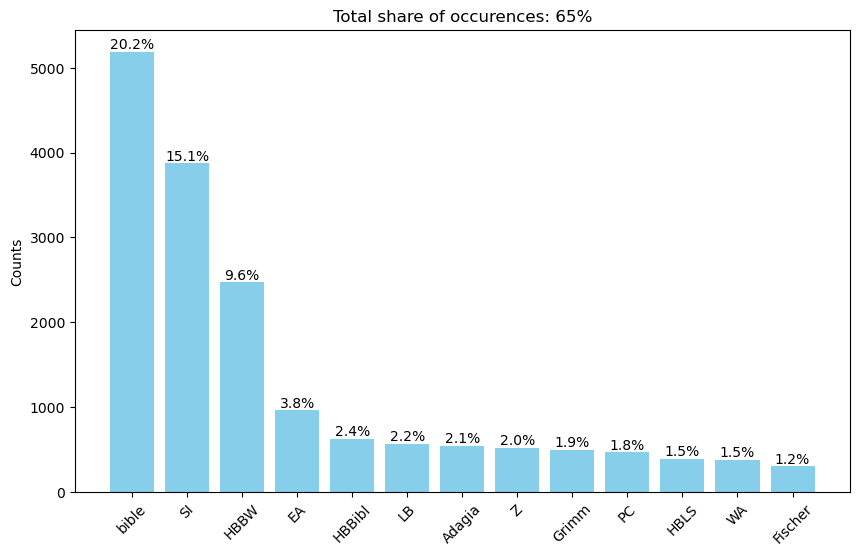

In [44]:
import bullinger_plots
bullinger_plots.bar(lit_counter_new, 0.65)

In [45]:
from collections import defaultdict, Counter
from html import unescape  # from xml.sax.saxutils import unescape ->> does not work properly... :/
import re

lit_counter = defaultdict(int)
for xml_footnote in footnote_df["xml_footnote"]:
    matches = re.findall(r"<bibl.*?>(.*?)</bibl>", xml_footnote)
    for match in matches:
        match = unescape(match)  # take away excape sequences of the xml
        lit_counter[match] += 1

lit_counter = Counter(lit_counter)


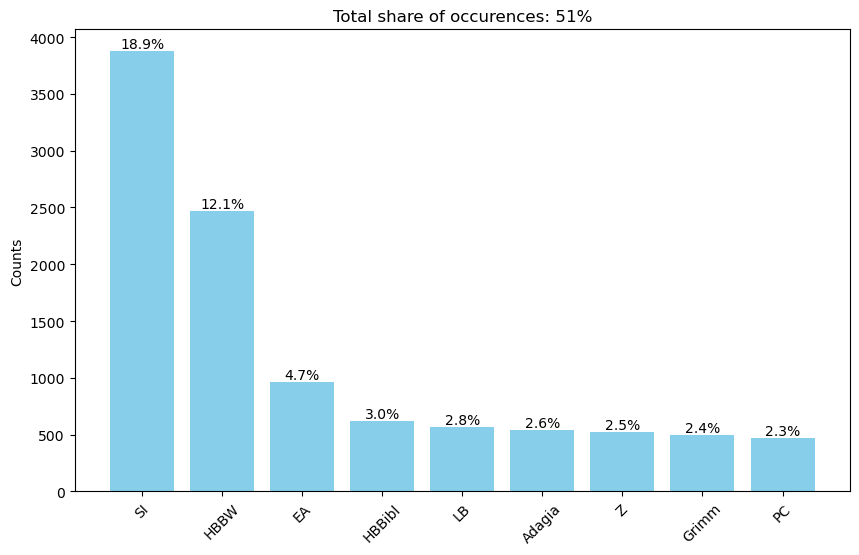

In [46]:
import bullinger_plots
bullinger_plots.bar(lit_counter, 0.50)

In [ ]:
[(title, lit_map[title], occ) for title, occ in lit_counter.most_common()[:18]]
# !! kommt zweimal das Erasmus ding vor, mit anderen Kürzeln??
# !! 'Fischer' kommt als kürzel zweimal vor, einmal für Hans fischer, etwas, einmal das Schwäbische Wörterbuch !!!! WTF, whywhywhywhywhywhy


[('EA', 'Amtliche Sammlung der ältern Eidgenössischen Abschiede', 872),
 ('Adagia', 'ASD II/1-9', 492),
 ('LB', 'Desiderii Erasmi Roterodami opera omnia', 481),
 ('Z', 'Huldreich Zwinglis sämtliche Werke', 445),
 ('PC',
  'Politische Correspondenz der Stadt Strassburg im Zeitalter der Reformation',
  432),
 ('HBLS', 'Historisch-biographisches Lexikon der Schweiz', 357),
 ('WA',
  'D. Martin Luthers Werke. Kritische Gesamtausgabe (Weimarer Ausgabe)',
  314),
 ('ASD', 'Opera omnia Desiderii Erasmi Roterodami', 212),
 ('BucerDS',
  'Martin Bucers Deutsche Schriften, im Auftrag der Heidelberger Akademie der Wissenschaften',
  176),
 ('HBD',
  'Heinrich Bullingers Diarium (Annales vitae) der Jahre 1504-1574',
  170),
 ('Blarer BW', 'Briefwechsel der Brüder Ambrosius und Thomas Blaurer', 169),
 ('Zwa', 'Zwingliana', 157),
 ('HBRG', 'Heinrich Bullingers Reformationsgeschichte', 146),
 ('AZürcherRef',
  'Actensammlung zur Geschichte der Zürcher Reformation in den Jahren 1519-1533',
  145),
 ('